<a href="https://colab.research.google.com/gist/S1Bigo/514397c74e0d4f77a507f5253234a5fc/projetokeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

In [2]:
dataset = keras.datasets.cifar10
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()

In [3]:
len(imagens_treino)

50000

In [4]:
imagens_treino.shape

(50000, 32, 32, 3)

In [5]:
len(imagens_treino)
imagens_treino.shape
imagens_teste.shape
len(identificacoes_teste)
identificacoes_treino.min()
identificacoes_treino.max()

9

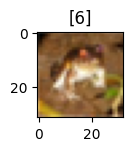

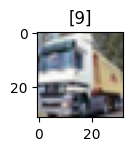

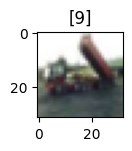

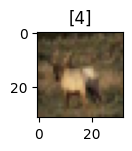

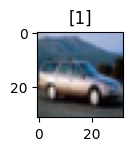

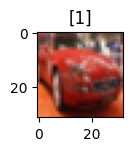

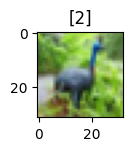

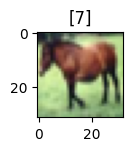

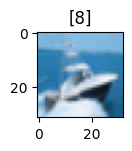

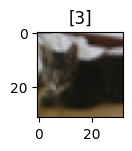

In [6]:
for imagem in range(10):
  plt.subplot(2, 5, imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(identificacoes_treino[imagem])
  plt.show()

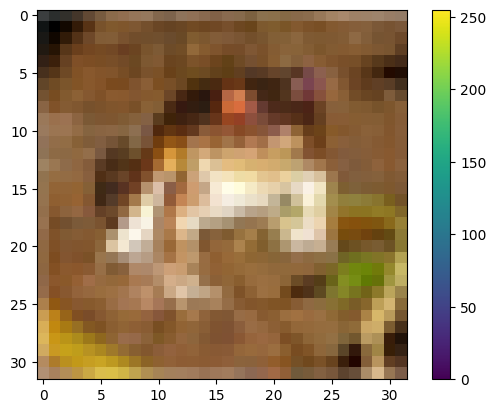

In [7]:
total_de_classificacoes = 10
nomes_de_classificacoes = ['airplane', 'automobile', 'bird',
                           'cat', 'deer', 'dog', 'frog',
                           'horse', 'ship', 'truck']

plt.imshow(imagens_treino[0])
plt.colorbar()

In [8]:
imagens_treino = imagens_treino/float(255)

In [15]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

#adam = keras.optimizers.Adam(learning_rate=0.002)

modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=6, validation_split=0.2)

Epoch 1/6
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.2235 - loss: 2.1422 - val_accuracy: 0.3374 - val_loss: 1.8685
Epoch 2/6
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - accuracy: 0.2964 - loss: 1.9119 - val_accuracy: 0.3216 - val_loss: 1.8569
Epoch 3/6
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.3094 - loss: 1.8787 - val_accuracy: 0.3486 - val_loss: 1.8134
Epoch 4/6
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.3202 - loss: 1.8604 - val_accuracy: 0.3761 - val_loss: 1.7810
Epoch 5/6
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.3282 - loss: 1.8409 - val_accuracy: 0.3652 - val_loss: 1.7811
Epoch 6/6
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.3316 - loss: 1.8329 - val_accuracy: 0.3760 - val_loss: 1.7505


In [11]:
testes =modelo.predict(imagens_teste)
print(np.argmax(testes[0]))
print(identificacoes_teste[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
5
[3]


In [12]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste: ', perda_teste)
print('Acurácia do teste: ', acuracia_teste)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2386 - loss: 135.3076
Perda do teste:  135.50888061523438
Acurácia do teste:  0.23499999940395355


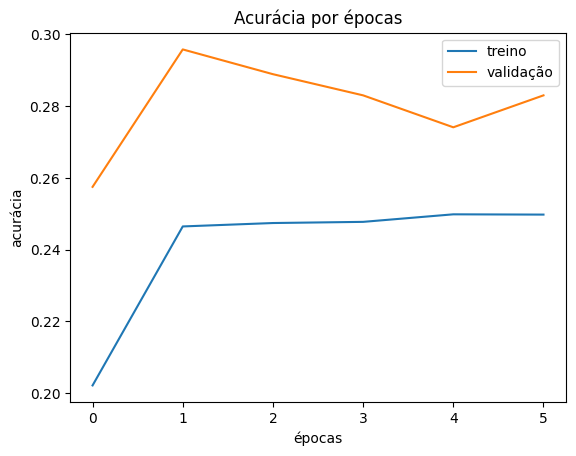

In [13]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

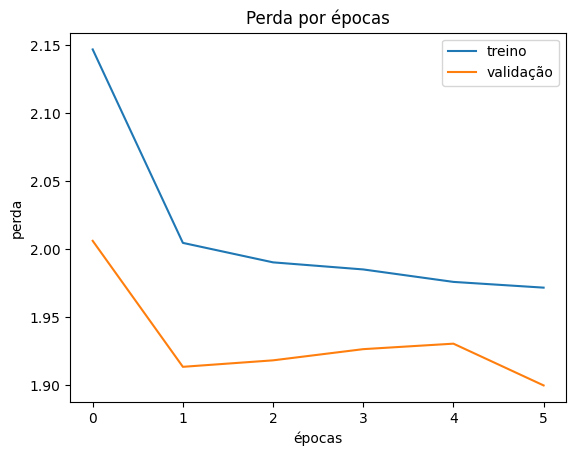

In [14]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])